In [4]:
from google.colab import files
uploaded = files.upload()

Saving merged_stocks.xlsx to merged_stocks.xlsx


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Excel file
df = pd.read_excel("merged_stocks.xlsx")

In [7]:
# Display the first few rows of the dataframe
print(df.head())

  Exchange Symbol              Shortname               Longname      Sector  \
0      NMS   MSFT  Microsoft Corporation  Microsoft Corporation  Technology   
1      NMS   MSFT  Microsoft Corporation  Microsoft Corporation  Technology   
2      NMS   MSFT  Microsoft Corporation  Microsoft Corporation  Technology   
3      NMS   MSFT  Microsoft Corporation  Microsoft Corporation  Technology   
4      NMS   MSFT  Microsoft Corporation  Microsoft Corporation  Technology   

                    Industry  Currentprice      Marketcap        Ebitda  \
0  Software - Infrastructure       415.605  3088905142272  1.251820e+11   
1  Software - Infrastructure       415.605  3088905142272  1.251820e+11   
2  Software - Infrastructure       415.605  3088905142272  1.251820e+11   
3  Software - Infrastructure       415.605  3088905142272  1.251820e+11   
4  Software - Infrastructure       415.605  3088905142272  1.251820e+11   

   Revenuegrowth  ...                                Longbusinesssummary  

In [8]:
# Estimate the number of shares
df['NumShares'] = df['Marketcap'] / df['Currentprice']

In [9]:
# Calculate EPS
df['EPS'] = df['Ebitda'] / df['NumShares']

In [10]:
# Calculate P/E ratio
df['PE Ratio'] = df['Currentprice'] / df['EPS']

In [11]:
# Check for missing values
print(df.isnull().sum())

Exchange                    0
Symbol                      0
Shortname                   0
Longname                    0
Sector                      0
Industry                    0
Currentprice                0
Marketcap                   0
Ebitda                  58348
Revenuegrowth            2012
City                        0
State                   38228
Country                     0
Fulltimeemployees        6036
Longbusinesssummary         0
Weight                      0
Date                        0
Symbol_1                    0
Adj Close              104272
Close                  104272
High                   104272
Low                    104272
Open                   104272
Volume                 104272
NumShares                   0
EPS                     58348
PE Ratio                58348
dtype: int64


In [12]:
# Drop rows with missing values
df.dropna(inplace=True)

In [13]:
# Convert datatype of P/E ratio to numeric
df['PE Ratio'] = pd.to_numeric(df['PE Ratio'], errors='coerce')

In [14]:
# Summary statistics of the P/E ratio
print(df['PE Ratio'].describe())

count    813566.000000
mean         15.380015
std          13.532664
min         -45.436051
25%           7.671980
50%          12.295387
75%          17.811618
max         113.031048
Name: PE Ratio, dtype: float64


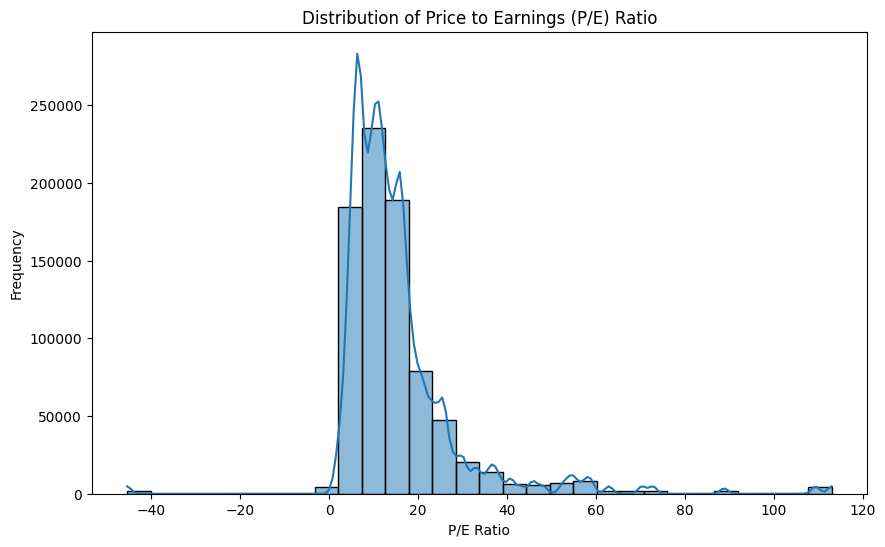

In [15]:
# Plotting the distribution of P/E ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['PE Ratio'], bins=30, kde=True)
plt.title('Distribution of Price to Earnings (P/E) Ratio')
plt.xlabel('P/E Ratio')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Grouping by industry and calculating median P/E ratio
median_pe_by_industry = df.groupby('Industry')['PE Ratio'].median().sort_values()

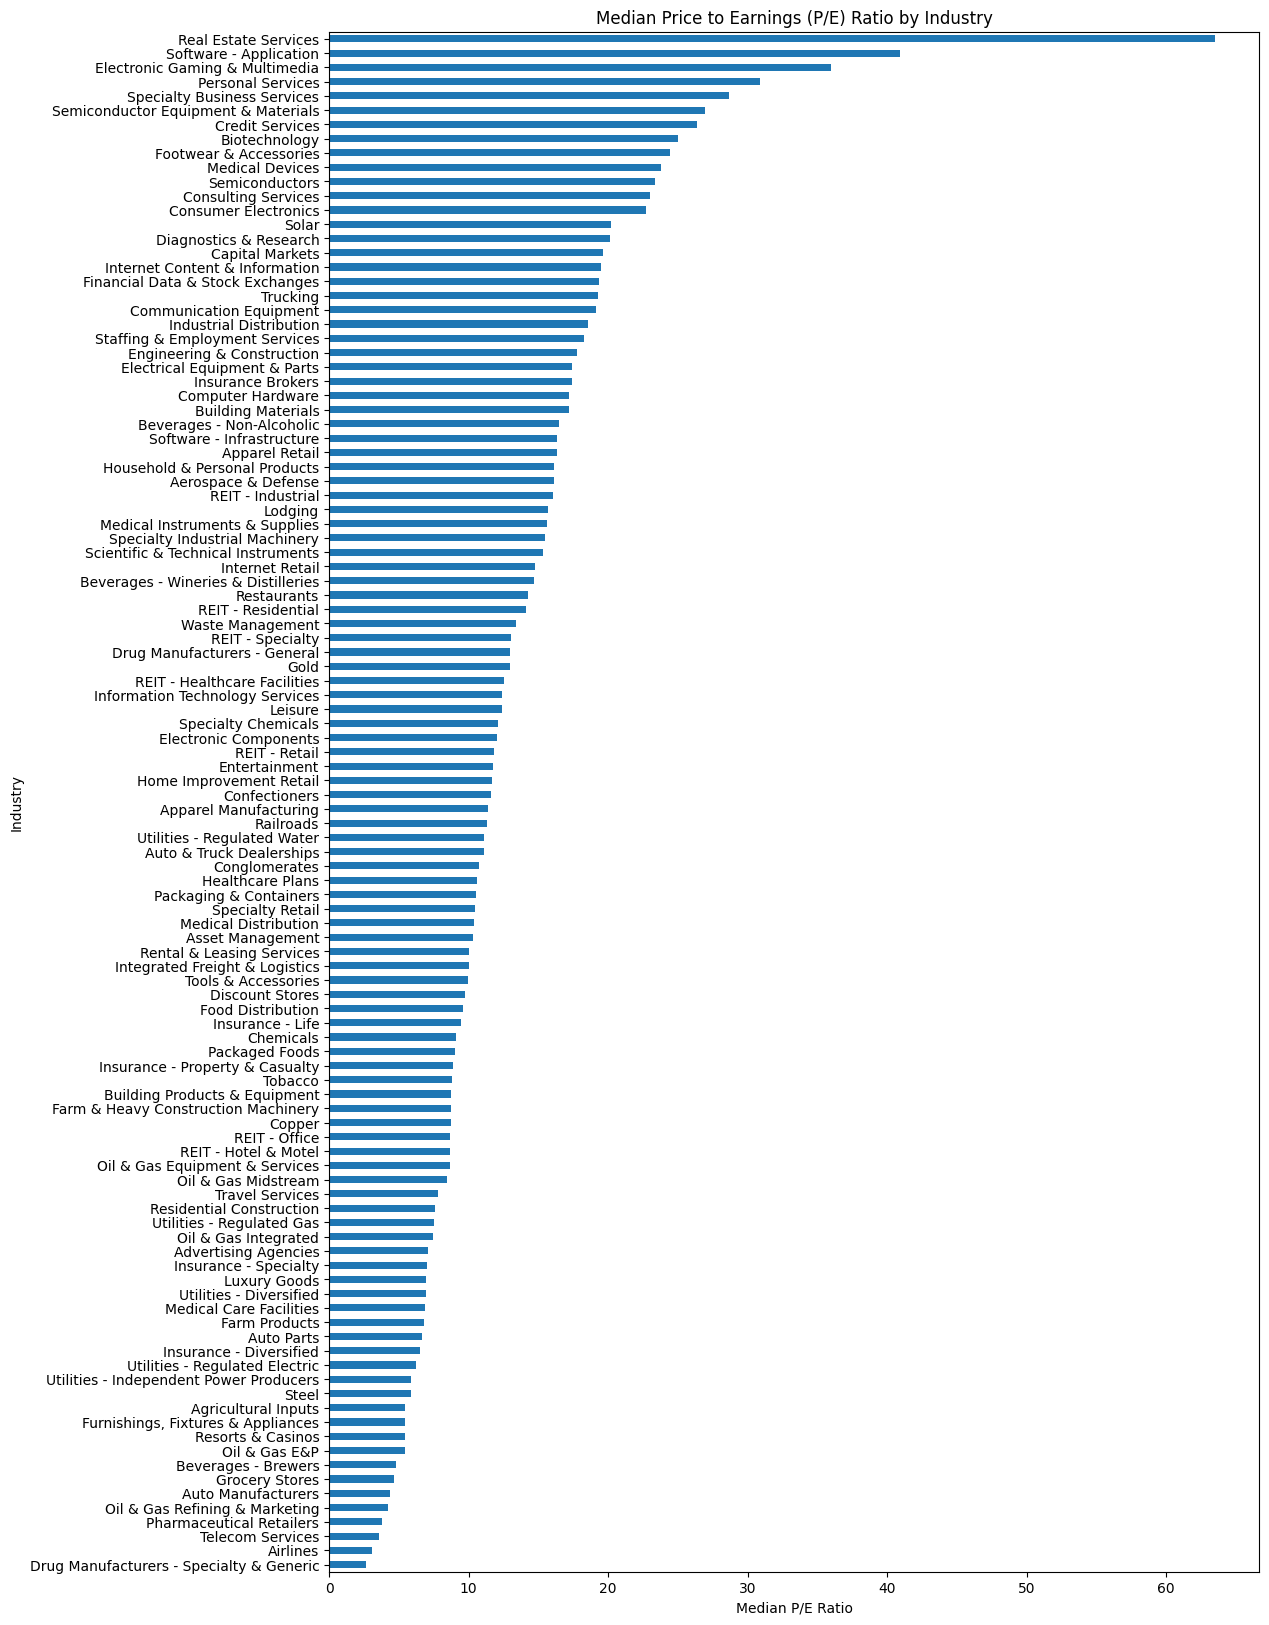

In [27]:
# Plotting median P/E ratio by industry
plt.figure(figsize=(12, 20))
median_pe_by_industry.plot(kind='barh')
plt.title('Median Price to Earnings (P/E) Ratio by Industry')
plt.xlabel('Median P/E Ratio')
plt.ylabel('Industry')
plt.show()

In [18]:
unique_industries_count = df['Industry'].nunique()
print(f'There are {unique_industries_count} unique industries in the dataset.')


There are 108 unique industries in the dataset.


In [40]:
# Grouping by industry and calculating median P/E ratio
median_pe_by_industry = df.groupby('Industry')['PE Ratio'].median().sort_values(ascending=False)

In [43]:
# Selecting the top 20 industries by median P/E ratio
top_20_industries = median_pe_by_industry.head(20).sort_values(ascending=True)

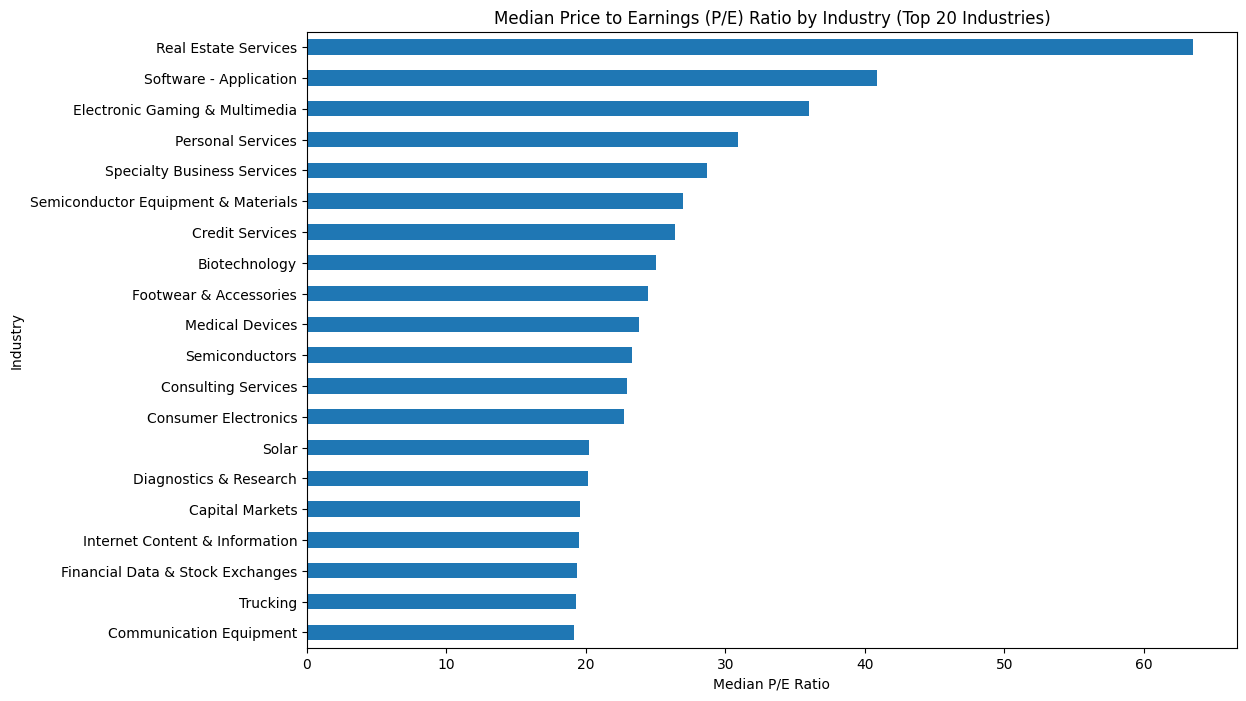

In [44]:
# Plotting median P/E ratio by industry for top 20 industries
plt.figure(figsize=(12, 8))
top_20_industries.plot(kind='barh')
plt.title('Median Price to Earnings (P/E) Ratio by Industry (Top 20 Industries)')
plt.xlabel('Median P/E Ratio')
plt.ylabel('Industry')
plt.show()